In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Normal Distribution

population mean: 10, population std: 2
sample mean: 10.07, sample std: 1.91


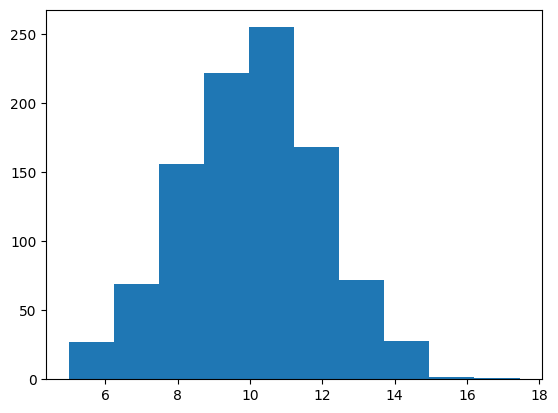

In [2]:
# Population
mean = 10
std_dev = 2
print(f"population mean: {mean}, population std: {std_dev}")
# sampling
n_samples = 1000
sample = np.random.normal(loc=mean, scale=std_dev, size=n_samples)
# print(sample)
print(f"sample mean: {np.mean(sample):0.2f}, sample std: {np.std(sample):0.2f}")
g = plt.hist(sample, bins=10)

In [3]:
import numpy as np 
import scipy.stats as st 

# SAT ~ N(1100, 200)
sat_mean = 1100
sat_std = 200
# Ann GOT SAT Score
Ann_score = 1190
print(f"SAT is normal distribution of mean {sat_mean} and std {sat_std}")
z_score = (Ann_score - sat_mean) / sat_std
print(f"Ann's z score: {z_score: 0.3f}")
print(f"Ann's percentile: {st.norm.cdf(z_score):0.3f}")
# probability to get at least her score
print(f"probability she scores at least {Ann_score} on SAT: {1-(st.norm.cdf(z_score)):0.3f}")
# p-value of Ann's score
print(f"p-value of Ann's score: {2*(1 - st.norm.cdf(z_score)):0.3f}")

SAT is normal distribution of mean 1100 and std 200
Ann's z score:  0.450
Ann's percentile: 0.674
probability she scores at least 1190 on SAT: 0.326
p-value of Ann's score: 0.653


In [4]:
# US male's hight
p_mean = 70
p_std = 3.3
# hight of 40th percentile?
z_40th = st.norm.ppf(0.4) # standard normal!!!
print(f"zscore of 40th percentile: {z_40th:0.3f}")
# z = (x-mu) / sigma => x = z*sigma + mu
hight_40th = z_40th * p_std + p_mean
print(f"hight of 40th perdentile is {hight_40th / 12: 0.1f}")

zscore of 40th percentile: -0.253
hight of 40th perdentile is  5.8


In [5]:
from scipy.stats import norm 
# SAT ~ N(1100, 200)
mu = 1100
sigma = 200
# what is the 95th percentile for SAT score?
percentile = 0.95
z = norm.ppf(percentile)
# z = (x - mu) / sigma, x = z*sigma + mu
sat = z * sigma + mu 
print(f"{percentile} percentile sat score is: {sat:0.1f}")

0.95 percentile sat score is: 1429.0


In [6]:
import scipy.stats as st 
# audlt male heights ~ N(70, 3.3)
mu, sigma = 70, 3.3
# waht is the probability that a randomly selected male
# is at least 74 inches?
z = (74 - mu) / sigma 
prob = 1 - st.norm.cdf(z)
print(f"z score: {z:0.2f}, prob: {prob:0.3f}")

z score: 1.21, prob: 0.113


In [12]:
# truncated distribution
# Given a percentile_threshold, mean m, and standard deviation sd of the normal distribution, write a function truncated_dist to simulate a normal distribution truncated at percentile_threshold.
import numpy as np 
import scipy.stats as st 

m = 2
sd = 1
percentile_thresdhold = 0.75

z_limit = st.norm(loc=m, scale=sd).ppf(percentile_thresdhold)
rv = np.random.normal(loc=m, scale=sd, size=1)

print(f"z limit is {float(z_limit):0.2f} and rv is {float(rv):0.2f}")
print("truncated distribution vale is:")

print(z_limit if rv >= z_limit else np.round(rv,2)[0])



z limit is 2.67 and rv is 2.52
truncated distribution vale is:
2.52


## Bernoulli Distribution

In [12]:
import scipy.stats as st 
#Bernoulli Dsitribution
# probability that a client exceed deduction limit as p 
p = 0.3
sample_size = 30
# generate sample from the bernoulli distribution
sample = st.bernoulli.rvs(p=p, size=sample_size)
print("Bernoulli sample from p=0.3 \n", sample)
mu = np.mean(sample)
sigma = np.sqrt(mu *(1-mu))
print(f"mu=p: {mu:0.3f}, sigma = sqrt(p*(1-q)): {sigma:0.3f}")

Bernoulli sample from p=0.3 
 [0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0]
mu=p: 0.333, sigma = sqrt(p*(1-q)): 0.471


## Geometric Distribution

In [126]:
import scipy.stats as st
# Geometric distribution
# An insurane company want to find a case
# were a customer didn't exceed his/herdeduction.
# number of bernoulli trials until first success.
# success: not exceeding deduction
# fail: exceeding deduction

# in general 70% of customers don't exceed the deduction
p = 0.7
#probability that first and second exceed, 
# and the thirdnot exceed
print(f"probability of FFS: {(1-p)*(1-p)*p:0.3f}")
# probability n-1 Failes until the first sucess at n
print(f"probability the first success at kth trial:")
k = 5
print(f"k: {k}, prob: {((1-p)**(k-1))*p:0.3f}")

print("This is a geometric distribution")
print(f"mean : {1/p:0.3f}")
print(f"sigma: {np.sqrt((1-p)/p**2)}")
# how many cases we need to look up 
# until we find the first case of not exceeding their deductibile?
print(f"total number of trials to find the first not exceeding deductible:")
print(f"{1/p:0.2f} cases")

probability of FFS: 0.063
probability the first success at kth trial:
k: 5, prob: 0.006
This is a geometric distribution
mean : 1.429
sigma: 0.7824607964359517
total number of trials to find the first not exceeding deductible:
1.43 cases


p: 0.2, mu=1/p: 5.0, sigma(=sqrt(1-p)/p**2): 4.472
[ 4  4  5  1  9 15  5 12  3  2]


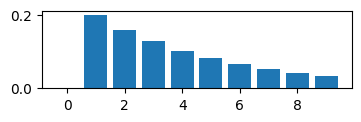

In [124]:
import scipy.stats as st
# generate geometric sample
p = 0.2
mu = 1/p # average total 1/p trials to get the first success
sigma = np.sqrt((1-p) / p**2)
print(f"p: {p}, mu=1/p: {mu:0.1f}, sigma(=sqrt(1-p)/p**2): {sigma:0.3f}")

# generate 10 samples
# f(k) = (1-p)**(k-1) * p
sample = st.geom(p=p).rvs(size=10)

print(sample)
K = [k for k in range(10)]
prob = [st.geom.pmf(k=k, p=p) for k in K]
plt.figure(figsize=(4,1))
plt.bar(x, prob)
plt.show()

## Binormial Distribution

prob only 1 sucess out of 10: 0.076
p:0.3, n: 10, mu=np:3.0, sigma=sqrt(np(1-p)):1.449
[4 2 5 3 0 2 4 1 6 1]
[(0, 0.0), (1, 0.1), (2, 0.2), (3, 0.3), (4, 0.2), (5, 0.1), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.0)]


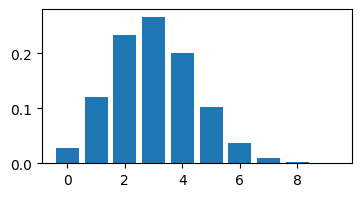

In [127]:
import numpy as np
import scipy.stats as st 
# binormial distribution
# the number of scucess in a fixed number of trials

# insurance: a person exceed deduction as success
p = 0.3
n = 10 # total number of trials
k = 1# number of success
# one out of four exceed the deduction
prob_bin_1_4 = 4 * 0.7 * (1-0.7)**3 # there are four cases 
print(f"prob only {k} sucess out of {n}: {prob_bin_1_4:0.3f}")

mu = n*p
sigma = np.sqrt(n*p*(1-p))  
print(f"p:{p}, n: {n}, mu=np:{mu}, sigma=sqrt(np(1-p)):{sigma:0.3f}")

# generate 10 samples
sample = st.binom(p=p, n=n).rvs(size=10)

print(sample)
K = [k for k in range(n)]
prob = [st.binom(p=p, n=n).pmf(k) for k in K]
print(list(zip(K, [round(p,1) for p in prob])))

plt.figure(figsize=(4,2))
plt.bar(x, prob)
plt.show()

In [68]:
import scipy.stats as st
import numpy as np 

# probability at least 7 success out of 10 trials
p = 0.3
n = 10

prob = 1- st.binom(p=p, n=n).cdf(6)
print(f"prob k >= 7 when p {p} and n {n}: {prob:0.4f}")

# Calculate manually the probability of getting at least 7 successes
probability = sum([np.math.comb(n, k) * p**k * (1 - p)**(n - k) for k in range(7, n+1)])

print(f"Probability of at least 7 successes out of 10 trials: {probability:0.4f}")

prob k >= 7 when p 0.3 and n 10: 0.0106
Probability of at least 7 successes out of 10 trials: 0.0106


## Normal approximation to Binomial distribution

check - Meet positive casses: True,     check - Meet negative cases: True
normal approximation mu: 60.00, sigma: 7.14
probability of observing 42 or less smokers:     0.0059


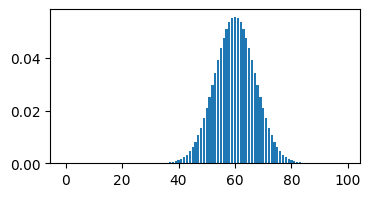

prob of observing 49, 50, 51:
     using binorm: 0.0649 
     using norm.pdf: 0.0633 
     using norm.cdf: 0.0420


In [114]:
import numpy as np
import scipy.stats as st 
import matplotlib.pyplot as plt

# about 15% of the US population smokes cigarettes.
p = 0.15
n = 400

# check positive and negative condition
print(f"check - Meet positive casses: {n*p > 10}, \
    check - Meet negative cases: {n*(1-p) > 10}")

mu = n*p
sigma = np.sqrt(n*p*(1-p))
norm = st.norm(loc=mu, scale=sigma)
binom = st.binom(n=n, p=p)
print(f"normal approximation mu: {mu:0.2f}, sigma: {sigma:0.2f}")
print(f"probability of observing 42 or less smokers: \
    {norm.cdf(x=42):0.4f}")

plt.figure(figsize=(4,2))
plt.bar(x=[x for x in range(100)], 
        height=[norm.pdf(x) for x in range(100)])
plt.show()

print(f"prob of observing 49, 50, 51:\n \
    using binorm: {sum(binom.pmf(x) for x in [49,50,51]):0.4f} \n \
    using norm.pdf: {sum(norm.pdf(x) for x in [49,50,51]):0.4f} \n \
    using norm.cdf: {norm.cdf(51) - norm.cdf(49):0.4f}")

## Negative Binomial Distribution  

### NOTE: n and k has different definitions in scypy.stats.nbinom!!!
- geometric distribution: the first success at k trials.   
- negative binormial: the nth success after k failures. total trials = n + k

In [141]:
import numpy as np 
import scipy.stats as st

# Brian meakes each 35 yard filed goal with probability 0.8.
p = 0.8

# n: number of success
# k: number of failure
# probability of fourth golas at 6th trials
n, k = 4, 6-4
prob_negbinom= st.nbinom(p=p, n=n)
print(f"prob of 4th scucess at 6th trial (2 failures): {prob_negbinom.pmf(k=k):0.4f}")
# probabilty of 4th sucess within 5 attemps?
print(f"probabilty of 4th sucess within 5 attemps (0 or 1 failure):\
    {st.nbinom.pmf(p=0.8, n=4, k=0)+ st.nbinom.pmf(p=0.8, n=4, k=1):0.2f}")

prob of 4th scucess at 6th trial (2 failures): 0.1638
probabilty of 4th sucess within 5 attemps (0 or 1 failure):    0.74


## Poisson Distribution
- Estimating the number of evetns in a large population over a unit of time
- of fixed population if the individuals within population are independent.